# Decision Trees on loaded dataset

In [3]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
# Step 2: Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target

In [5]:
# Convert to DataFrame for better readability
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y

In [6]:
# Step 3: Data Overview
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [7]:
# Step 4: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Step 5: Train the Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [9]:
# Step 4: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Step 5: Train the Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [11]:
# Step 6: Evaluate the model
y_pred = clf.predict(X_test)

In [12]:
# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

Model Accuracy: 1.0


In [13]:
# Step 7: Detailed Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [14]:
# Step 8: Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [15]:
# Step 9: Feature Importance
feature_importances = clf.feature_importances_
for feature, importance in zip(iris.feature_names, feature_importances):
    print(f"Feature: {feature}, Importance: {importance:.4f}")

Feature: sepal length (cm), Importance: 0.0000
Feature: sepal width (cm), Importance: 0.0000
Feature: petal length (cm), Importance: 0.9346
Feature: petal width (cm), Importance: 0.0654


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

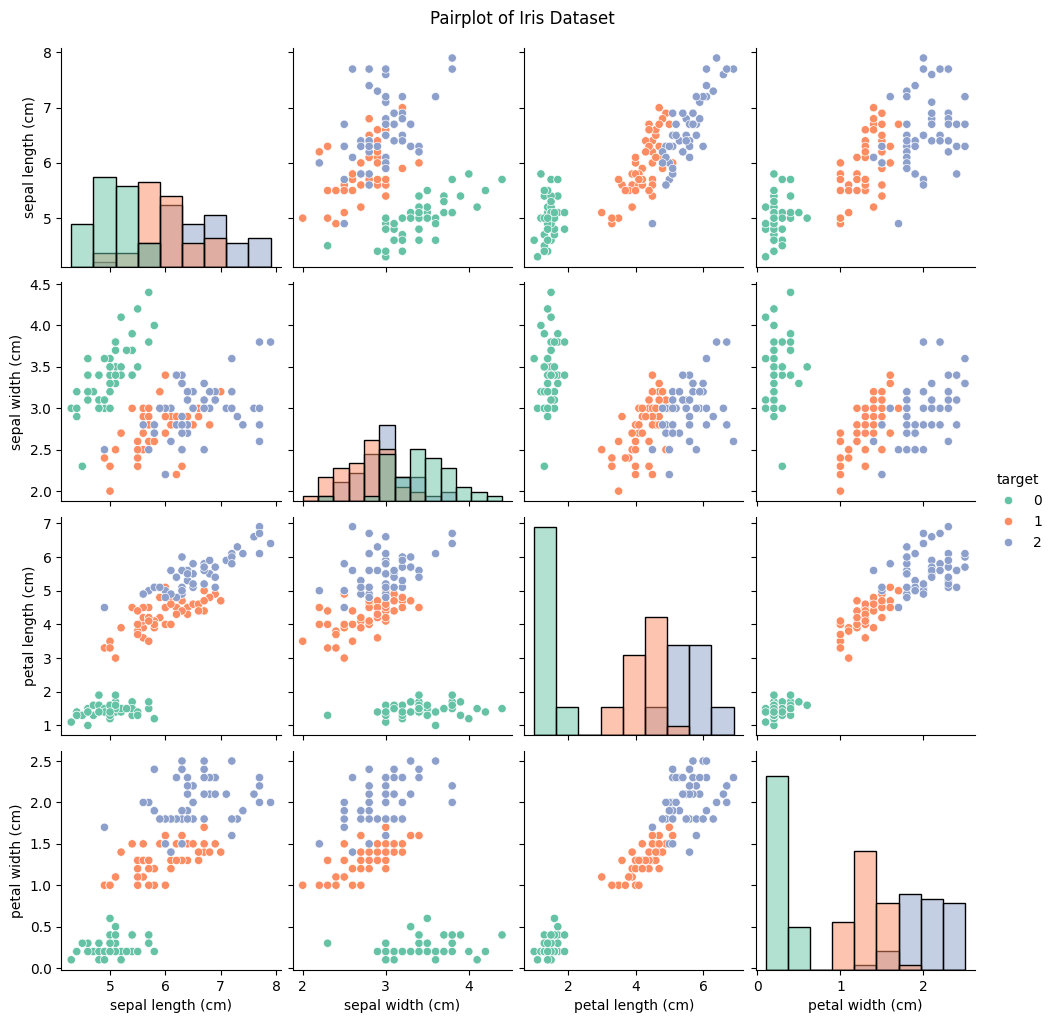

In [17]:
# Step 10: Visualize data distributions and relationships
# Pairplot to visualize feature relationships with target
sns.pairplot(df, hue="target", diag_kind="hist", palette="Set2")
plt.suptitle("Pairplot of Iris Dataset", y=1.02)
plt.show()

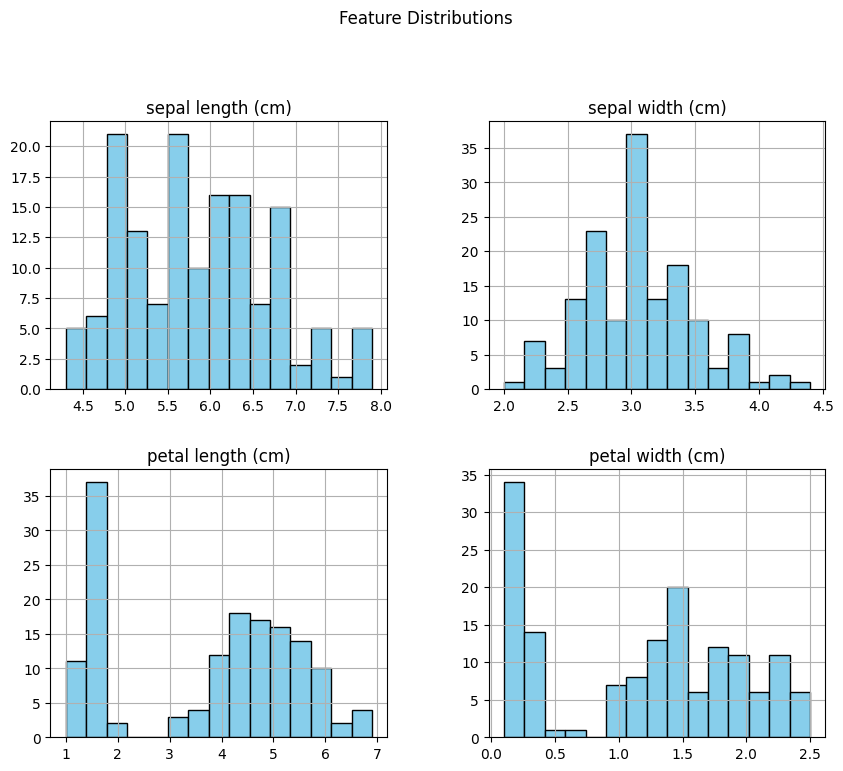

In [18]:
# Histograms for each feature
df_features = df.drop('target', axis=1)
df_features.hist(figsize=(10, 8), bins=15, color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions", y=1.02)
plt.show()

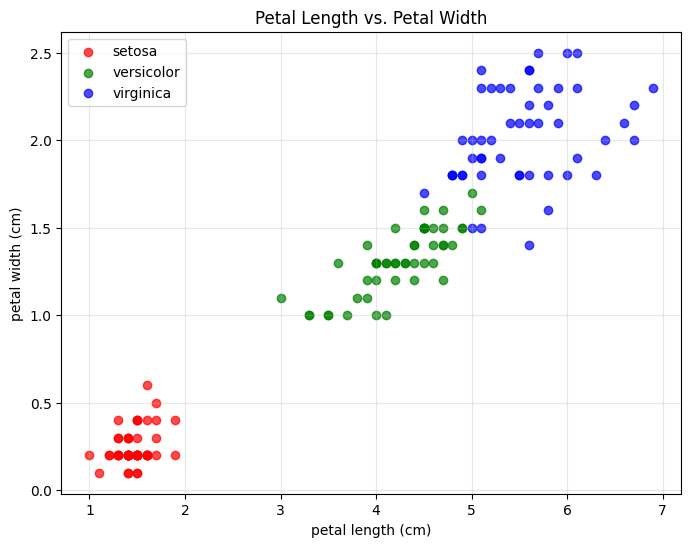

In [19]:
# Scatter plot of petal length vs. petal width, colored by species
plt.figure(figsize=(8, 6))
for target, color, label in zip(range(3), ['red', 'green', 'blue'], iris.target_names):
    subset = df[df['target'] == target]
    plt.scatter(subset[iris.feature_names[2]], subset[iris.feature_names[3]], color=color, label=label, alpha=0.7)
    plt.title("Petal Length vs. Petal Width")
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.legend()
plt.grid(alpha=0.3)
plt.show()